Import all the rquired libraries

In [1]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression 
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [2]:
# Read the data
bank_data = pd.read_csv("bank-full.csv")

In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# From above there are no null values in any of the 17 coulmns
# Also, there are many variables that have Dtype as object which mean categorical data, these would need treatment too
# Another way to check for nulls
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [6]:
# Lets look at the data itself
bank_data.head(15)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
#  lets look into some more details
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


In [8]:
# From here we find interesting things about various features
# The median balance is 448 but the max is 102,127.00, so we may have some outliers which we will investigate 
# The skewness can also be seen for duration, campaign, pdays and previous attributes

plot for job


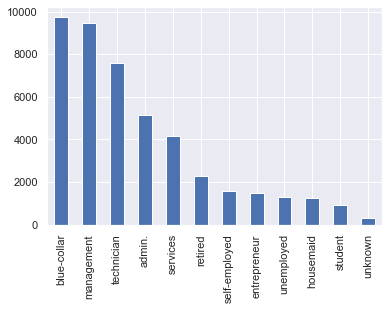

plot for marital


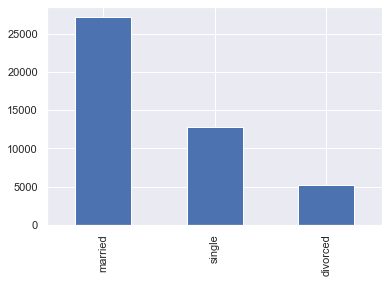

plot for education


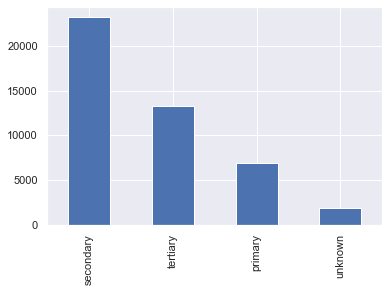

plot for default


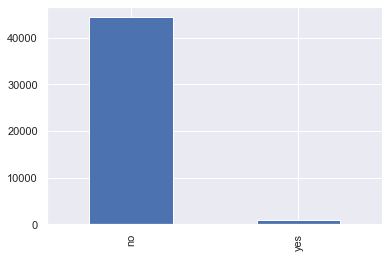

plot for housing


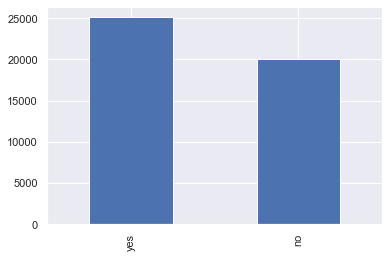

plot for loan


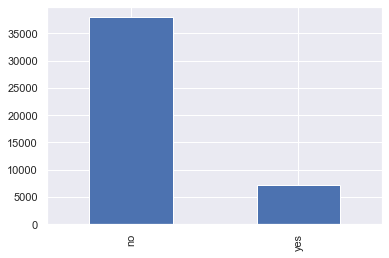

plot for contact


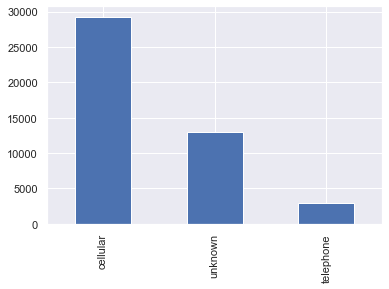

plot for month


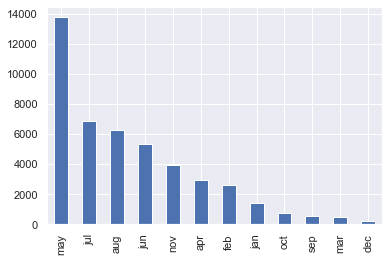

plot for poutcome


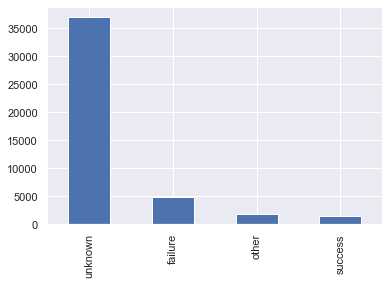

In [9]:
# Now lets look at categorical variables in detail by ploting them
cat_colnames = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in cat_colnames:
    print('plot for ' + col )
    bank_data[col].value_counts().plot.bar()
    plt.show()



In [10]:
# Insights
# a large number of people were contacted in the month of may and it reduced with each month
# Main source of contact was cellular
# A large number of people don't have a personal loan
# Most of the people don't have credit in default
# close to 50% of people have secondary education and a liitle more than 50% are married
# Blue collar, management and technician are dominate the occupations in this dataset
# We see there are unknowns in poutcome, contact, education and job
# we can remove unknowns from the education and job but not from poutcome and contact as significant amount of data falls in that category

# # Data treatment #1
# bank_data = bank_data[bank_data.education != 'unknown']
# bank_data = bank_data[bank_data.job != 'unknown']

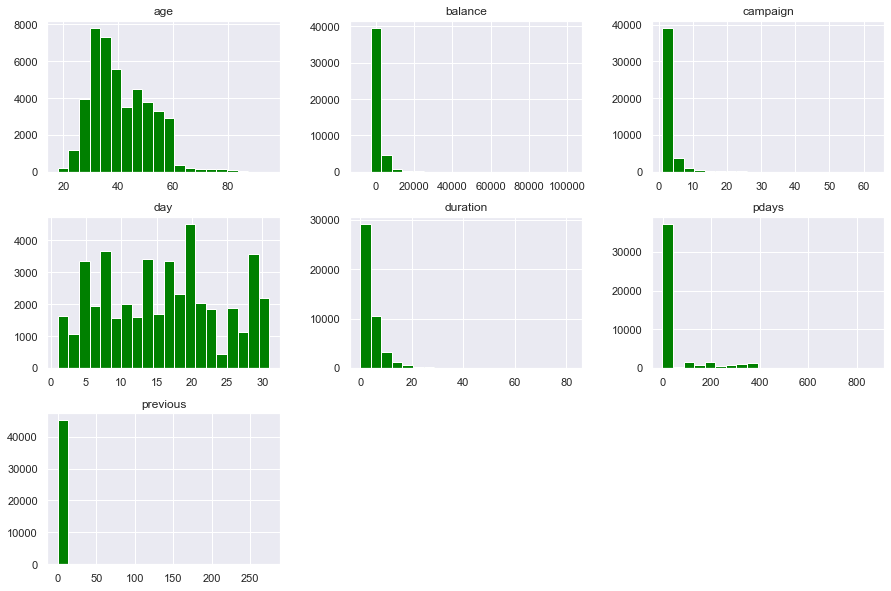

In [11]:
# There are clearly outliers that have to be treated
# Now lets look at continuous variables

# First lets convert duration to minutes
bank_data['duration'] = bank_data['duration'].apply(lambda x:x/60).round(2)


# Plot all the continuous variables
bank_data.hist(bins=20, figsize=(15,10), color='green')
plt.show()


In [12]:
# Insights
# The data here seems skewed for most of the attributes
# age seems very less skewed
# Also, day doesn't seem to be skewed
# Lets find out how much skewness each of the attributes have

col_interested = ['age', 'balance', 'campaign', 'day', 'duration', 'pdays', 'previous']

for col in col_interested:
    print(col)
    print(bank_data[col].skew().round(2))
    


# so lets start data treatment
# Data treatment #2
# Let claculate the z score for the numericat columns

age
0.68
balance
8.36
campaign
4.9
day
0.09
duration
3.14
pdays
2.62
previous
41.85


In [13]:
# Clearly balance, campaign, duration, pdays and previous need treatment as they have a lot of outliers
print(bank_data.shape)
from scipy.stats import zscore


col_tobe_treated = ['balance', 'campaign', 'duration', 'pdays', 'previous']
for col in col_tobe_treated:
    name = col + '_outliers'
    bank_data[name] = bank_data[col]
    bank_data[name]= zscore(bank_data[name])
    condition1 = (bank_data[name]>3) | (bank_data[name]<-3)
    bank_data = bank_data.drop(bank_data[condition1].index, axis = 0, inplace=False)
    bank_data = bank_data.drop(name, axis=1)
    print(bank_data.shape)
    
print(bank_data.columns)    

(45211, 17)
(44466, 17)
(43637, 17)
(42717, 17)
(41216, 17)
(40728, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


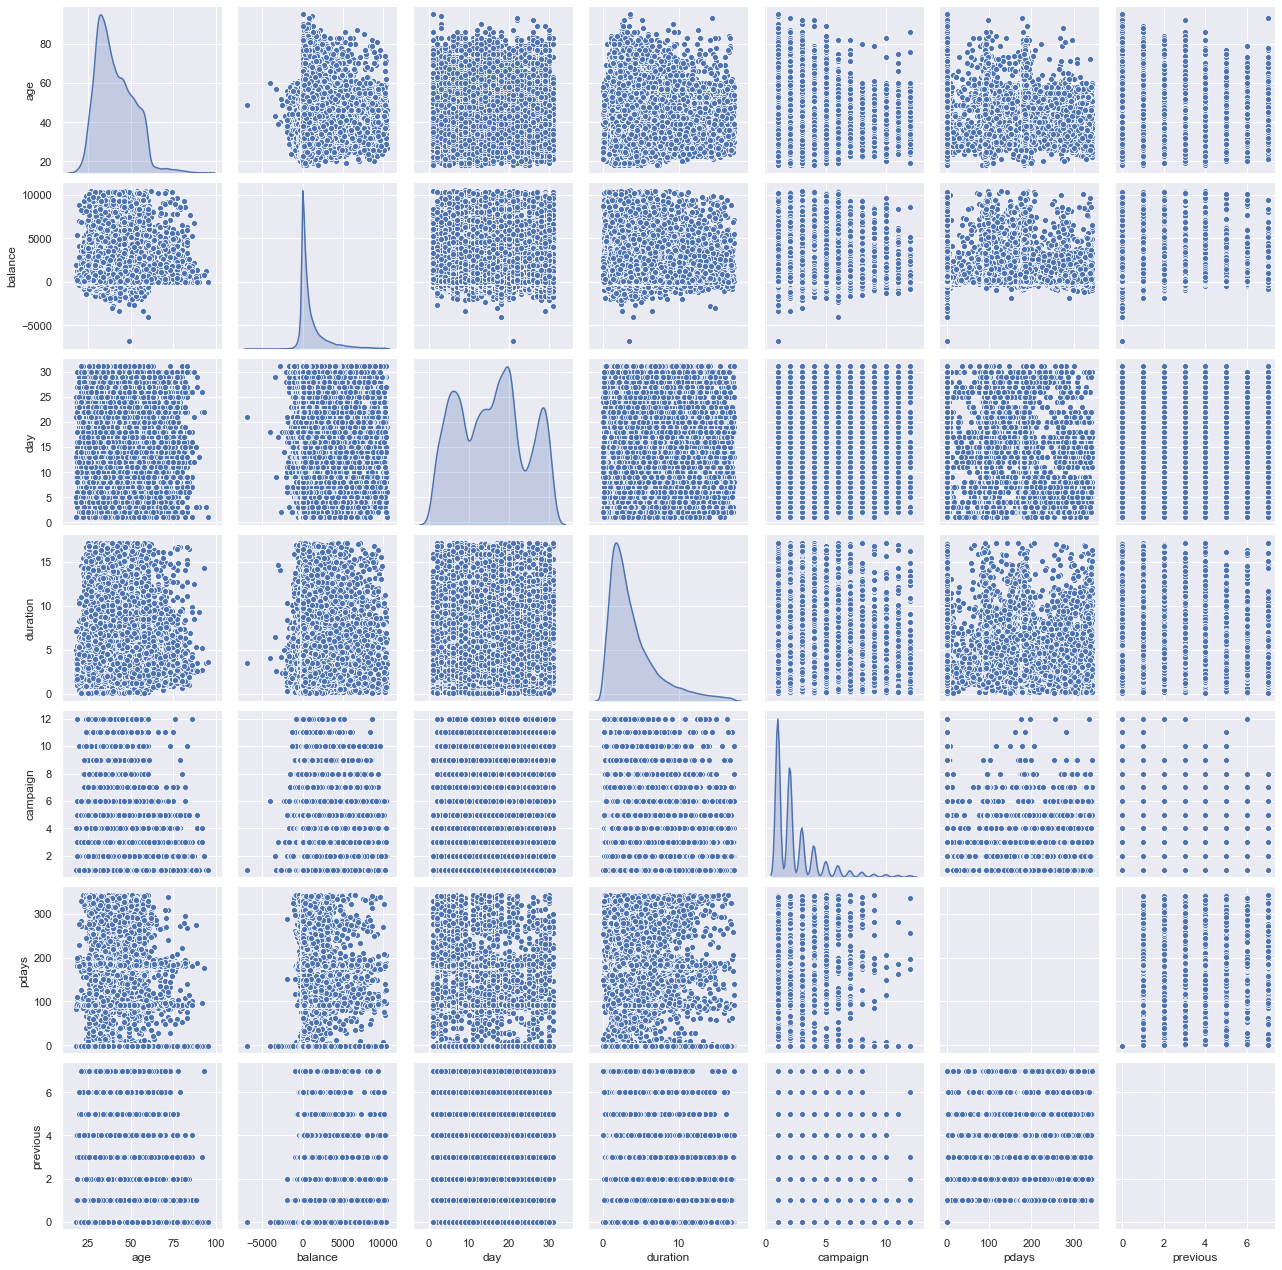

In [14]:

sns.pairplot(bank_data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target']], diag_kind = 'kde');

In [15]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.30,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,2.32,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,3.62,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,6.33,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,0.83,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,0.92,1,-1,0,unknown,no


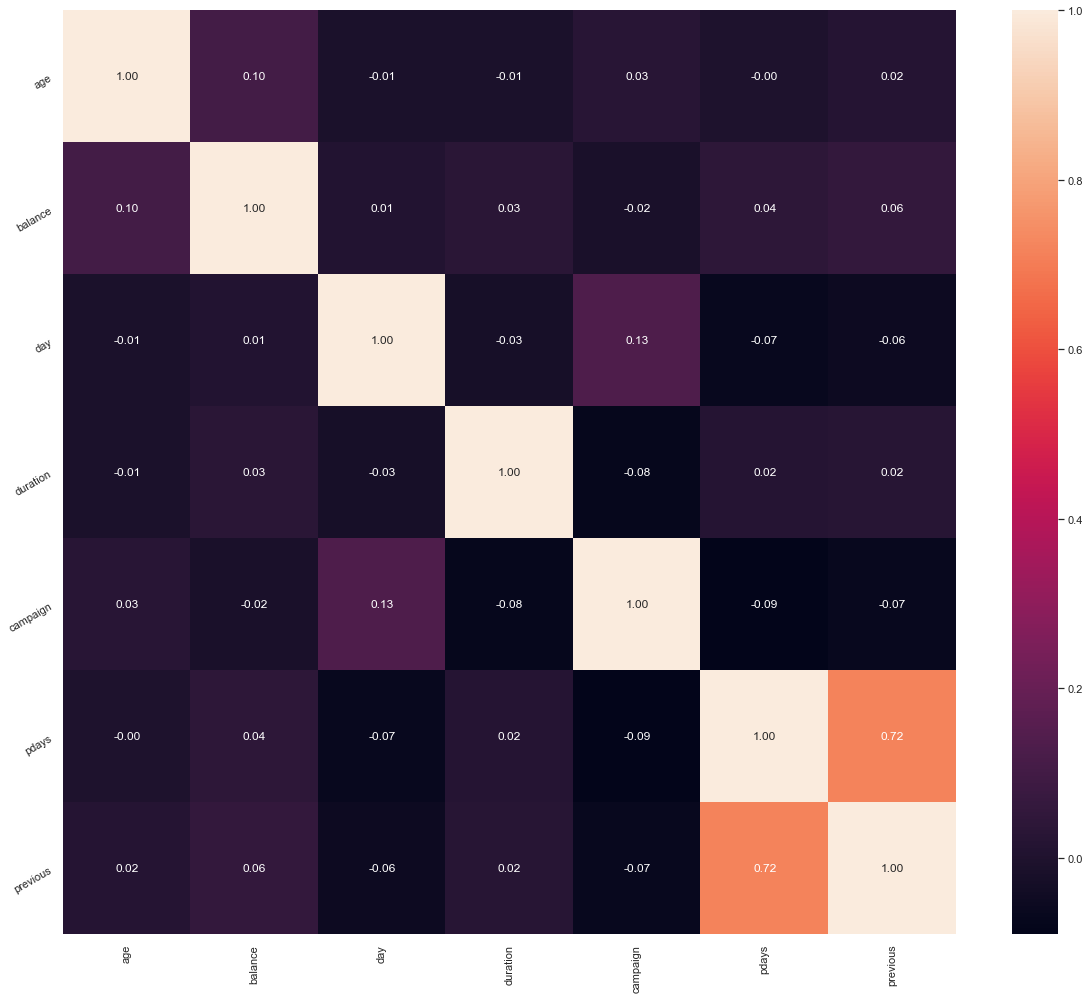

In [16]:
# lets look at some corelations
corr = bank_data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,17))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

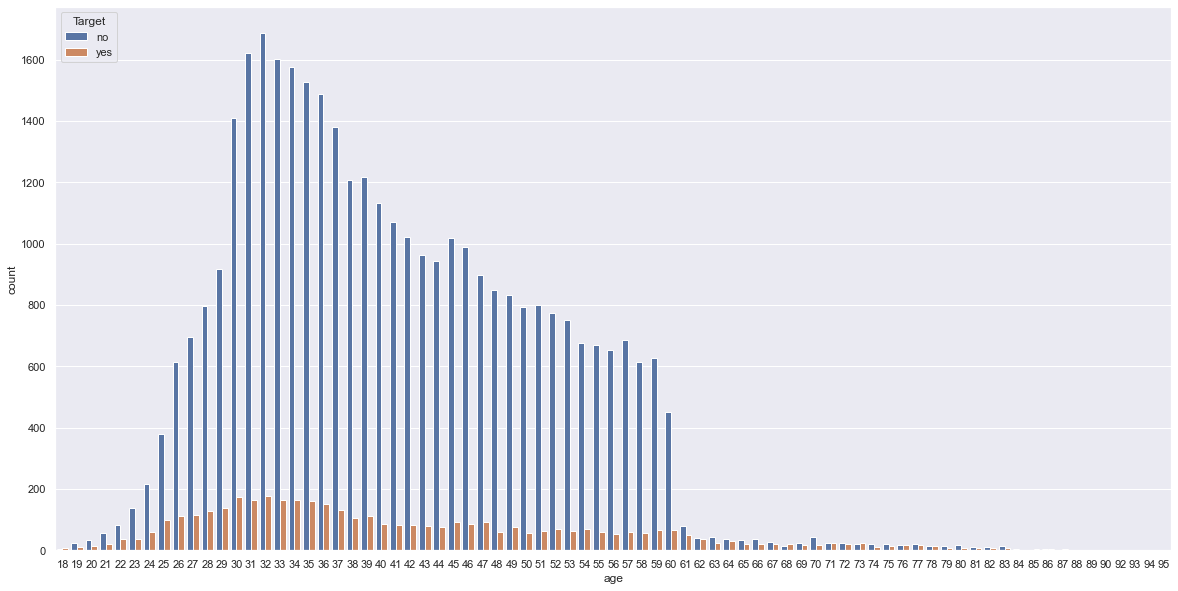

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(bank_data['age'], hue = "Target", data=bank_data)


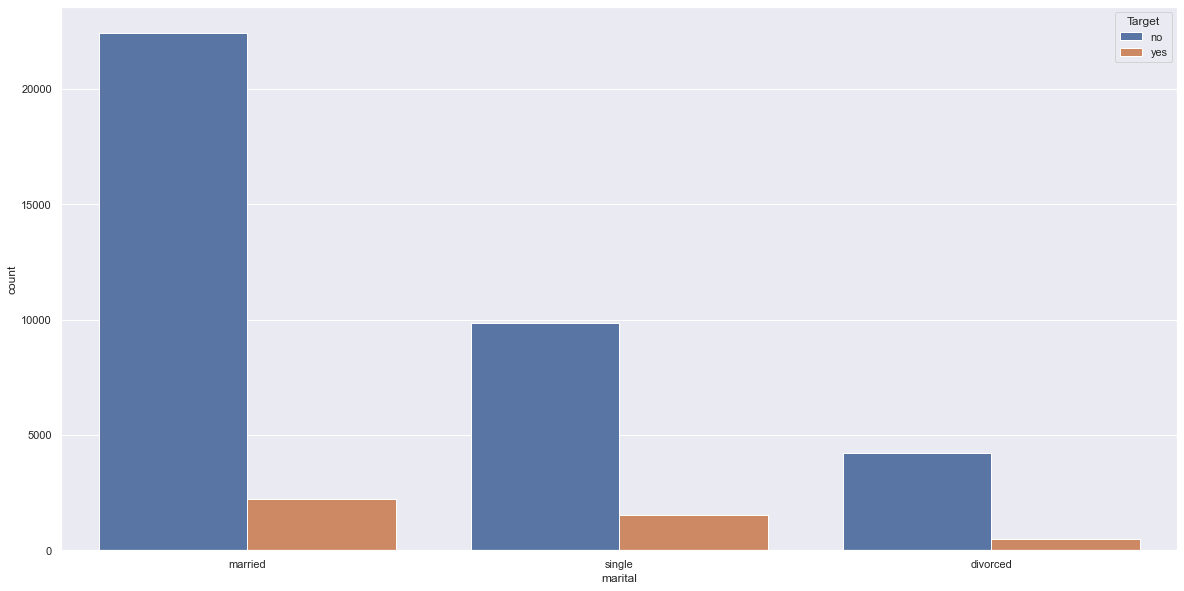

In [18]:
# insight: from above young people tend to subscribe more to term deposit
# now lets look at marilat vs target
plt.figure(figsize=(20,10))
sns.countplot(bank_data['marital'], hue = "Target", data=bank_data)

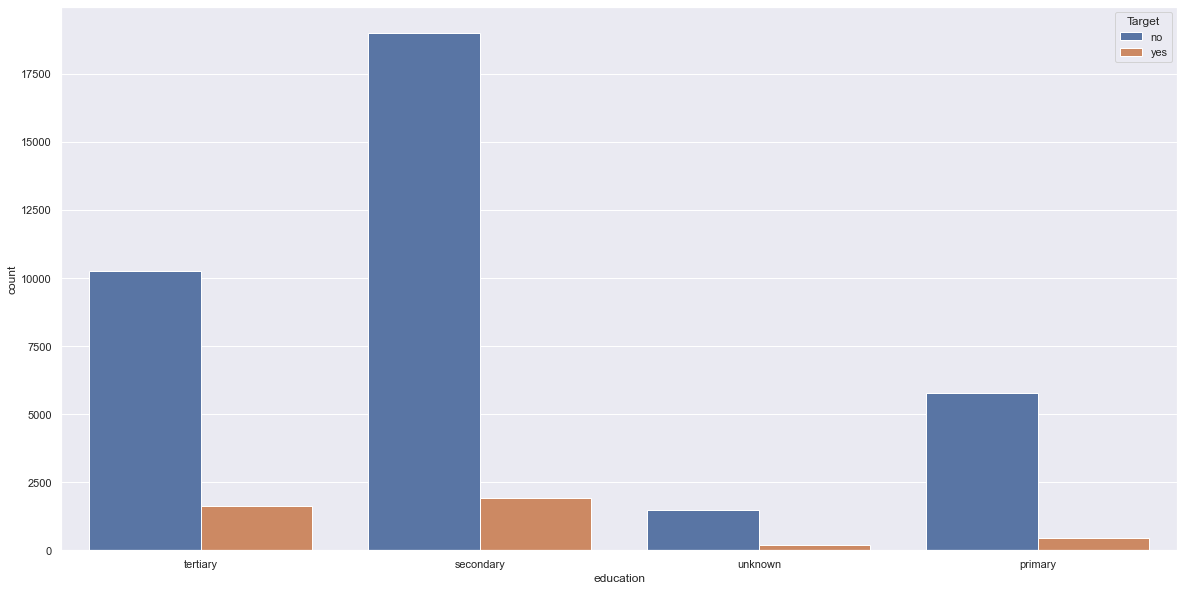

In [19]:
# insight: married cuatomer tend to subscribe more to Term deposit
# now lets look at education 
plt.figure(figsize=(20,10))
sns.countplot(bank_data['education'], hue = "Target", data=bank_data)

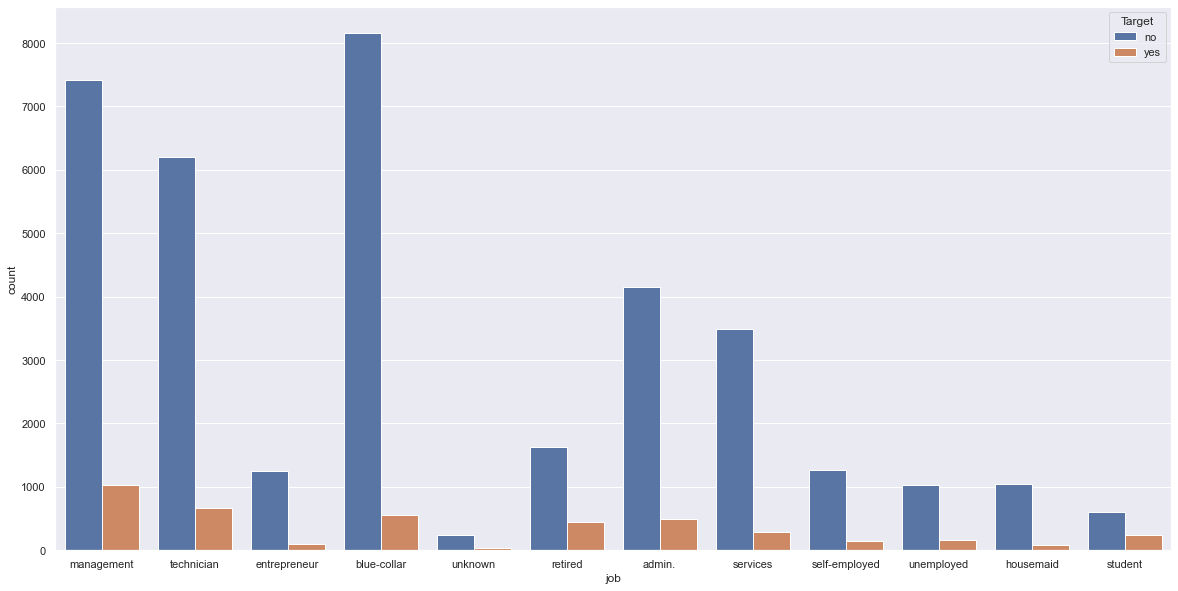

In [20]:
# insight: customers with secondary education tend to subscribe more to Term deposit
# now lets look at job vs Target
plt.figure(figsize=(20,10))
sns.countplot(bank_data['job'], hue = "Target", data=bank_data)

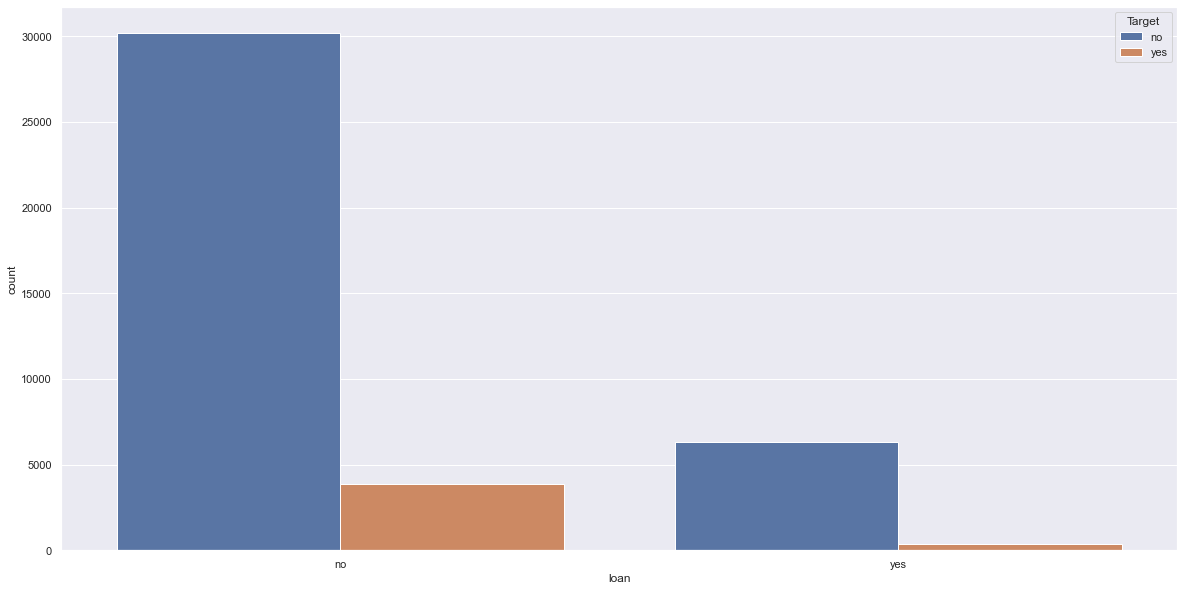

In [21]:
# Insight: from above people with management job tend to subscribe more to Term deposit
# now lets see hoe term deposit subscription varies with personal loan
plt.figure(figsize=(20,10))
sns.countplot(bank_data['loan'], hue = "Target", data=bank_data)

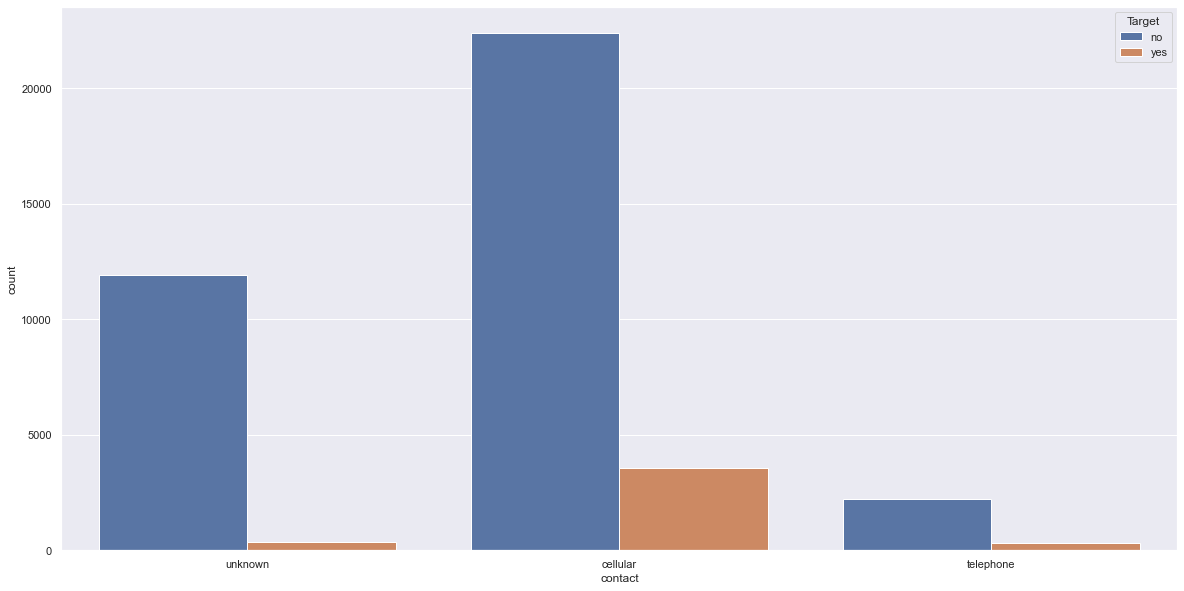

In [22]:
# Insight: from above people with no personal loan tend to subscribe more to Term deposit
# lets see contact vs Target
plt.figure(figsize=(20,10))
sns.countplot(bank_data['contact'], hue = "Target", data=bank_data)

In [23]:
# data preprocessing
# drop colums are not needed
bank_data.drop('pdays', axis=1, inplace = True)
bank_data.drop('month', axis=1, inplace = True)


# hot encoding jobs
bank_data = pd.get_dummies(bank_data, prefix='job', columns=['job']) 
bank_data = pd.get_dummies(bank_data, prefix='edu', columns=['education']) 
bank_data = pd.get_dummies(bank_data, prefix='marital', columns=['marital']) 
bank_data = pd.get_dummies(bank_data, prefix='default', columns=['default']) 
bank_data = pd.get_dummies(bank_data, prefix='housing', columns=['housing']) 
bank_data = pd.get_dummies(bank_data, prefix='loan', columns=['loan']) 
bank_data = pd.get_dummies(bank_data, prefix='contact', columns=['contact']) 
bank_data = pd.get_dummies(bank_data, prefix='poutcome', columns=['poutcome']) 

# convering yes/no in Target to int


bank_data['int_target'] = bank_data['Target'].apply(lambda x: 0 if x == 'no' else 1)
bank_data.drop('Target', axis=1, inplace = True)




In [24]:
bank_data.head(10)

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,int_target
0,58,2143,5,4.35,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,44,29,5,2.52,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,33,2,5,1.27,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,47,1506,5,1.53,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,33,1,5,3.30,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,35,231,5,2.32,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6,28,447,5,3.62,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
7,42,2,5,6.33,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
8,58,121,5,0.83,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
9,43,593,5,0.92,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [25]:
# Let's split our data into traing and test sets
from sklearn.model_selection import train_test_split
X = bank_data.drop('int_target',axis=1)
Y = bank_data['int_target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
40886,61,2,12,2.18,1,3,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3207,53,420,15,1.67,1,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1
36575,40,1808,12,9.33,1,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,1
19391,58,4,6,2.45,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
41251,66,1943,24,6.68,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [26]:
# Checking the data split, Just making sure

print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank_data.index)) * 100))
print("{0:0.2f}% data is in testing set".format((len(x_test)/len(bank_data.index)) * 100))

70.00% data is in training set
30.00% data is in testing set


In [27]:
# Create the model
lr_model1 = LogisticRegression(solver = 'liblinear')
lr_model1.fit(x_train,y_train)
y_predicted =  lr_model1.predict(x_test)
y_predicted
model_score=lr_model1.score(x_test, y_test)
print(model_score)

0.9050658810049922


In [28]:
# calculating probability of the targets
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = lr_model1.predict_proba(x_test)[:,0]# customer doesn't accept personal loan
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = lr_model1.predict_proba(x_test)[:,1] # customer accepts personal loan

z['Predicted'] = lr_model1.predict(x_test)                               # Predicting target variable using sklearn Logistic regression

z.head()

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,0,0.99,0.01,0
1,0,0.94,0.06,0
2,0,0.97,0.03,0
3,0,0.98,0.02,0
4,0,0.80,0.20,0


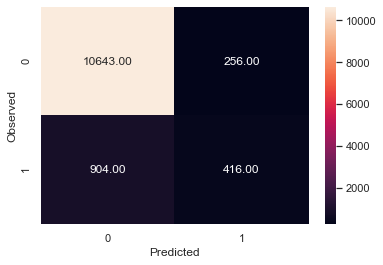

None


In [29]:
# Now lets create a confusion matrix
from sklearn.metrics import confusion_matrix

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
# Confusion Matrix
print(draw_cm(z['Actual'],z['Predicted'] ))

In [30]:
print("Trainig accuracy",lr_model1.score(x_train,y_train))  
print()
print("Testing accuracy",lr_model1.score(x_test, y_test))

Trainig accuracy 0.910800098214599

Testing accuracy 0.9050658810049922


In [31]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
lr_Recall = recall_score(y_test,y_predicted)
print("Recall:",lr_Recall)
print()
lr_precision = precision_score(y_test,y_predicted)
print("Precision:",lr_precision)
print()
lr_f1 = f1_score(y_test,y_predicted)
print("F1 Score:",lr_f1)
print()
lr_ROC = roc_auc_score(y_test,y_predicted)
print("Roc Auc Score:",lr_ROC)

Recall: 0.3151515151515151

Precision: 0.6190476190476191

F1 Score: 0.41767068273092367

Roc Auc Score: 0.6458315608604627


In [32]:
# building a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

#score
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))


# visualize the tree
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_File.close()



1.0
0.866273835829446


In [33]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.9091865726612649
0.9041656436696948


In [34]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#visualize

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

system command returning error: 32512


In [35]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))

                   Imp
age               0.06
balance           0.00
day               0.00
duration          0.50
campaign          0.00
previous          0.00
job_admin.        0.00
job_blue-collar   0.00
job_entrepreneur  0.00
job_housemaid     0.00
job_management    0.00
job_retired       0.00
job_self-employed 0.00
job_services      0.00
job_student       0.00
job_technician    0.00
job_unemployed    0.00
job_unknown       0.00
edu_primary       0.00
edu_secondary     0.00
edu_tertiary      0.00
edu_unknown       0.00
marital_divorced  0.00
marital_married   0.00
marital_single    0.00
default_no        0.00
default_yes       0.00
housing_no        0.01
housing_yes       0.00
loan_no           0.00
loan_yes          0.00
contact_cellular  0.00
contact_telephone 0.00
contact_unknown   0.00
poutcome_failure  0.00
poutcome_other    0.00
poutcome_success  0.43
poutcome_unknown  0.00


0.9041656436696948


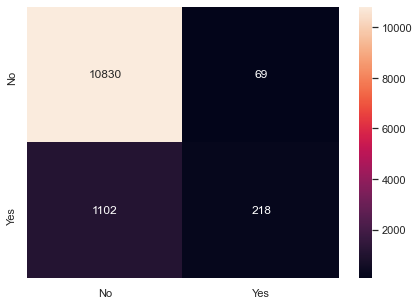

In [36]:
print(dTreeR.score(x_test , y_test))
y_predict = dTreeR.predict(x_test)

cm=confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [37]:
DT_Recall = recall_score(y_test,y_predict)
print("Recall:",DT_Recall)
print()
DT_precision = precision_score(y_test,y_predict)
print("Precision:",DT_precision)
print()
DT_f1 = f1_score(y_test,y_predict)
print("F1 Score:",DT_f1)
print()
DT_ROC = roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",DT_ROC)

Recall: 0.16515151515151516

Precision: 0.759581881533101

F1 Score: 0.2713130056004978

Roc Auc Score: 0.5794103295548382


In [38]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.9017104509370653


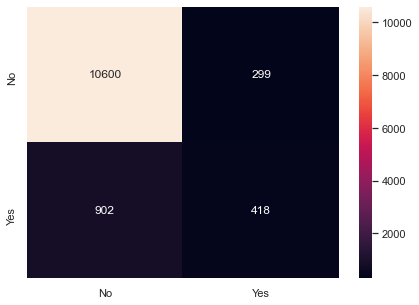

In [39]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [40]:
bag_Recall = recall_score(y_test,y_predict)
print("Recall:",bag_Recall)
print()
bag_precision = precision_score(y_test,y_predict)
print("Precision:",bag_precision)
print()
bag_f1 = f1_score(y_test,y_predict)
print("F1 Score:",bag_f1)
print()
bag_ROC = roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",bag_ROC)

Recall: 0.31666666666666665

Precision: 0.5829846582984658

F1 Score: 0.4104074619538537

Roc Auc Score: 0.6446164785760161


In [41]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

0.8999099762664703


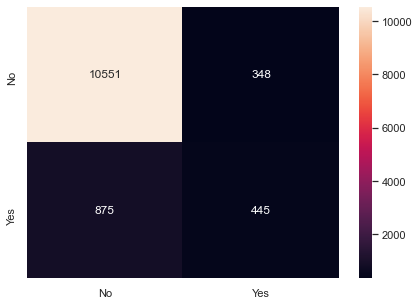

In [42]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [43]:
Aboost_Recall = recall_score(y_test,y_predict)
print("Recall:",Aboost_Recall)
print()
Aboost_precision = precision_score(y_test,y_predict)
print("Precision:",Aboost_precision)
print()
Aboost_f1 = f1_score(y_test,y_predict)
print("F1 Score:",Aboost_f1)
print()
Aboost_ROC = roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",Aboost_ROC)

Recall: 0.3371212121212121

Precision: 0.5611601513240857

F1 Score: 0.42120208234737344

Roc Auc Score: 0.652595838650752


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.9066208364023243


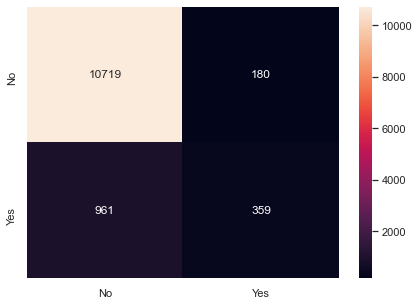

In [45]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [46]:
Gboost_Recall = recall_score(y_test,y_predict)
print("Recall:",Gboost_Recall)
print()
Gboost_precision = precision_score(y_test,y_predict)
print("Precision:",Gboost_precision)
print()
Gboost_f1 = f1_score(y_test,y_predict)
print("F1 Score:",Gboost_f1)
print()
Gboost_ROC = roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",Gboost_ROC)

Recall: 0.271969696969697

Precision: 0.6660482374768089

F1 Score: 0.38622915545992464

Roc Auc Score: 0.6277272101694067


In [47]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)

0.9033472460921516


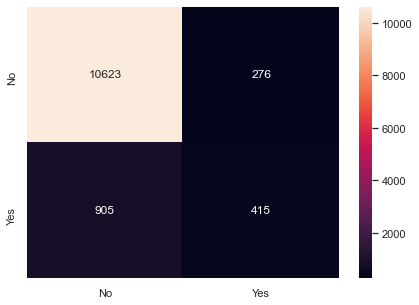

In [48]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [49]:
forest_Recall = recall_score(y_test,y_predict)
print("Recall:",forest_Recall)
print()
forest_precision = precision_score(y_test,y_predict)
print("Precision:",forest_precision)
print()
forest_f1 = f1_score(y_test,y_predict)
print("F1 Score:",forest_f1)
print()
forest_roc = roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",forest_roc)

Recall: 0.3143939393939394

Precision: 0.6005788712011577

F1 Score: 0.41272998508204867

Roc Auc Score: 0.6445352576132923


In [ ]:
# conclusion
# Comparing all the models it turns out that the best in this case is Random forest and Logistic regression 
# Both has nearly same precision and recall and also AUC
